| |   |
|---|---|
| derivative |  steepness at a point |
| |   |

So wherever/whenever the derivative is small - the steepness is small.

# Activation/Transform functions


- x : the summed up weighted input


In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Binary step function

This is threshold-based activation function. When the summed weighted inputs are sent to it, it either activates/fires the node (passing on its output) if threshold value is reached/surpassed, or it disregrads the input if the value is lower. So it returns either a 1 or a 0.

Because this is a simple piecewise (diffrent based on interval) function it generally isn't used in the hidden layers of a network. It usually appears only in the output layer of a binary classification model 
(is this a dog or a cat  ?) 

$$ f(x) = \begin{cases} 0 & \text{if } x < \theta \\ 1 & \text{if } x \geq \theta \end{cases} $$

in this case 0 is the treshold the input(x) has to reach in order for 

In [25]:
def binary_step(x, trenshold=0):
    if x >= trenshold: 
        return 1
    
    return 0

So lets say we are trying to figure out weather there is a dog or a cat on a picture. If the model predicted a value between 0 and 0.5 there is a dog, if the predicted valze is between 0.51 and 1 then there is a cat.

The output layer node reacives the value 0.7. And then calls its activation function (being binary step in this case). 


In [26]:
node_input = 0.7
model_treshold = 0.5

binary_step(x=node_input, trenshold=model_treshold)

1

The output of a model is 1, meaning there was a cat on the image.

Lets visualize it.

In [27]:
# x_ axis graph (from 0 to 1)
# array of 100 values from 0 to 1
x_axis = np.linspace(-10,10, 100)

In [28]:
treshold = 0

# mapped values ; what we get when we put an x into out function
y_axis = []

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(binary_step(x, trenshold=treshold))


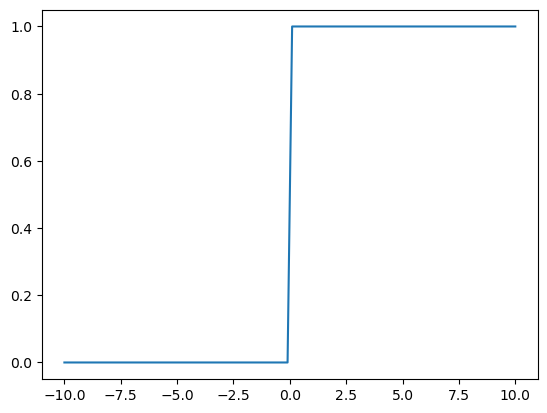

In [29]:
# draw
plt.plot(x_axis, y_axis)
plt.show()

## Linear activation function

$$ f(x) = w * x + b    $$

These straigh-line activation functions retain all the information from the given data. 

## Non-Linear activation functions
> (these are used in the majority of models - adding veriaty/non-lineraty - to mimic the data which generally also isn't linear)

### sigmoid

takes a single value as input - and transforms it to a value between 0 and 1 (ie. propability)

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$ 

In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [49]:
# mapped values ; what we get when we put an x into out function
y_axis = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(sigmoid(x))

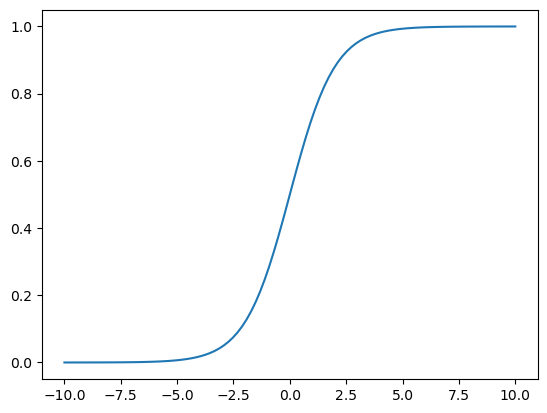

In [50]:
# draw
plt.plot(x_axis, y_axis)
plt.show()

### sigmoid - derivative

$$
\sigma(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

In [33]:
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [34]:
# mapped values ; what we get when we put an x into out function
y_axis_d = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis_d.append(sigmoid_d(x))

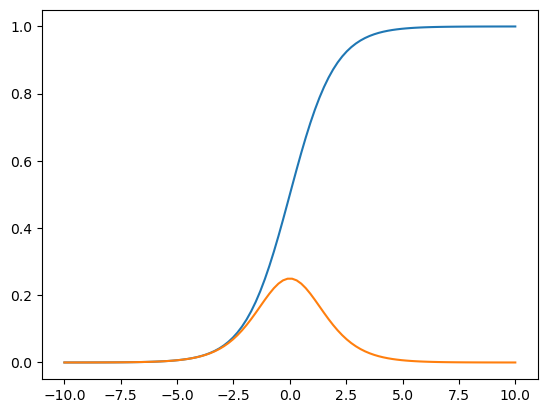

In [51]:
# draw
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis_d)
plt.show()

### tanh

Works similarly to sigmoid (ie. maps a value withing a range) but the range isn't 0 to 1 but -1 to 1.

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

In [36]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))

In [37]:
# mapped values ; what we get when we put an x into out function
y_axis = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(tanh(x))

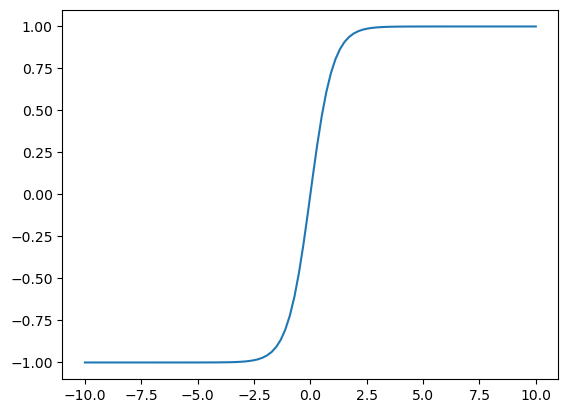

In [38]:
# draw
plt.plot(x_axis, y_axis)
plt.show()

### softmax

Does the same thing as sigmoid (ie. maps the input to a value between 0 and 1), but it takes in a vector of elements and returns a vector of probablities (ie. each element from the input vector becomes a value between 0 and 1 - so it is the same size as the input vector was).

So it takes in a vector - and for each element of that vector runs the exponent function $ e^{element} $. It takes that value and then devides it by the sum of all values withing that vector. And returns the probability for that specific element.

This result is then saved inside a new vector on the same index.

So the input vector (x) looks something like this : array[ $x_1$, $x_2$, $x_3$, $x_4$, ..].

The softmax function iterates over each element of this array ; 

$i = 1$, for $i \leq array\_lenght$

$$ softmax(x_i) = \frac{e^{x_i}}{ \sum_{k=1}^{n}e^{x_k}}  $$

$$ softmax(current\_element) = \frac{e^{current\_element}}{ \sum_{element\_of\_array=1}^{array\_lenght}e^{x_{element\_of\_array}}}  $$


The result vector look something like this: 
<br> array[ $softmax(x_1)$, $softmax(x_2)$, $softmax(x_3)$, $softmax(x_4)$, ..].

In [39]:
# x is a vector x  = (x1, x2, ..., xn)
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x)) 

In [40]:
#Example usage:
input_array = [1,2,3,4]

propability_array = softmax(input_array)

print(propability_array)

[0.0320586  0.08714432 0.23688282 0.64391426]


### ReLu (Rectified Linear Unit)

It is the positive part of it's argument. Any value below 0 is set to 0.

> currently most used (06. 03. 2024) because it avoids the vanishing gradient problem. (but creates the "dying ReLu" one)

 $$\text{ReLU}(x) = \max(0, x)$$

In [41]:
def ReLu(x):
    return max(0,x)

In [42]:
# mapped values ; what we get when we put an x into out function
y_axis = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(ReLu(x))

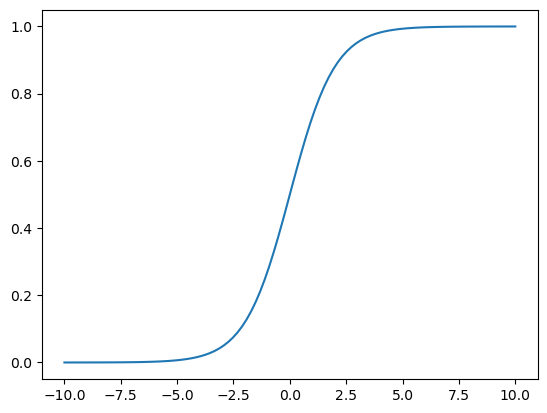

In [55]:
# draw
plt.plot(x_axis, y_axis)
plt.show()

### ReLu -  derivative

$$
\text{ReLu-d}(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{x} \leq 0
\end{cases}
$$

In [52]:
def ReLu_d(x):
    return np.where(x > 0, 1, 0)

In [53]:
# mapped values ; what we get when we put an x into out function
y_axis_d = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis_d.append(ReLu_d(x))

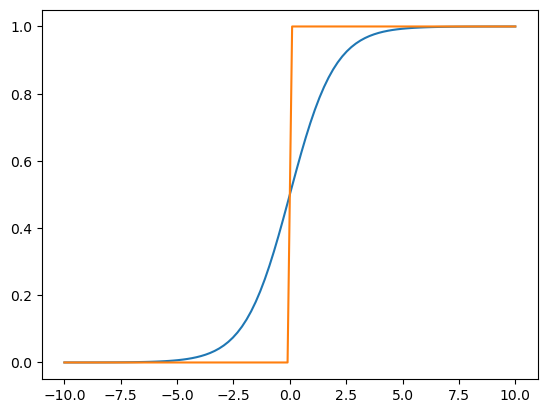

In [56]:
# draw
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis_d)
plt.show()

- dying relu

<img src="../assets/dying_relu.png" height="300px" width="680px">


> [! image source !](https://aiml.com/what-is-dying-relu-or-dead-relu-and-why-is-this-a-problem-in-neural-network-training/)


### Leaky ReLu

This is just like ReLu, but it allows for negative values to exist, having a small slope instead of a flat line. (if slope is 0 = ReLu)

$$ LReLu(x) = { x \text{ if } x \geq 0 \atop x*0.01 \text{ if } x < 0} $$ 

In [44]:
def LReLu(x, negative_slope=0):
    return max(0,x) + negative_slope*min(x,0)

In [45]:
# mapped values ; what we get when we put an x into out function
y_axis = [] #the loss

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(LReLu(x,0.2))

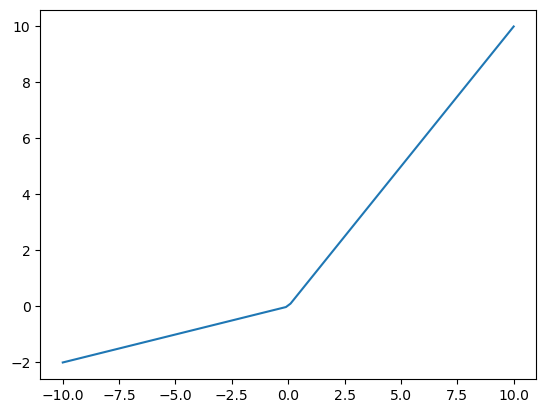

In [46]:
# draw
plt.plot(x_axis, y_axis)
plt.show()